# KNN- Classifier Algorithm: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset:

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Split the data into x and y:
x = df.drop('species', axis=1)
y = df['species']

In [7]:
# Load and fit the data on the KNN Classifier:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)

# Predict the species for a new set of measurment:
new_measurement = np.array([[5.1,3.5,1.4,0.2]])
knn.predict(new_measurement)

C:\Users\zahee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [8]:
# Train,test and split the data:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
# Fit the model on training data:
model.fit(x_train,y_train)


KNeighborsClassifier()

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(50.722222222222214, 0.5, 'True')

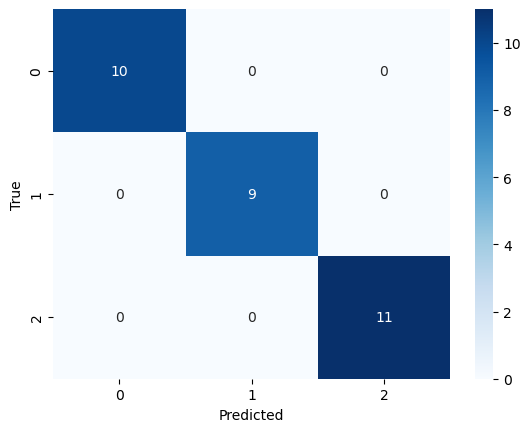

In [9]:
# predict the species for the test data:
y_pred = model.predict(x_test)

# Evaluate the model:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# Plot the confusion matrix:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

# KNN-Regresion Algorithm:

In [30]:
# Regression problem on tips dataset:

# import dataset:

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
# Split the data into x and y:
X = tips.drop('tip', axis=1)
Y = tips['tip']


In [32]:
# Encode the categorical columns using for loop and label encoder:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])


In [34]:
# Train, test, and split the data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X and Y are defined properly
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)

# Fit the model on the training data
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print(f"RMSE: {rmse}")


Mean Squared Error: 0.8382265306122448
R2 Score: 0.3294034029001649
RMSE: 0.9155471209130881


In [35]:
# Check the shapes of X and Y
print(X.shape)
print(Y.shape)


(244, 6)
(244,)


In [37]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
# Predict a specific value:
model.predict([[19.82,1,0,1,1,3]])

C:\Users\zahee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([2.632])